# A/B TESTING
***
# <center> Tunggal Manda Ary Triyono
# ---------------------------------------------------------------------------------------------------------------

### Case A/B Testing
***
Pada Kasus ini, telah dilakukan **A/B testing** terhadap sebuah **website e-commerce**. A/B Testing ini melihat apakah tampilan landing page website baru dapat lebih meningkatkan converted rate dari user. Hasil dari A/B Testing tersebut telah disimpan dalam file **ab_testing.csv**. Kemudian dilakukan analisis untuk membantu perusahaan memahami apakah mereka harus **mengimplementasikan halaman baru**, **mempertahankan halaman lama**, atau mungkin menjalankan eksperimen lebih lama untuk membuat keputusan.
***

# Import library dan dataset

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#set the seed to assure you get the same answers, otherwise, you could remove the following line
random.seed(100)

df = pd.read_csv('../data/ab_data.csv')

# Menampilkan dataset

In [2]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


***
Data A/B Testing ini terdiri dari data **user_id**, **timestamp**(waktu user mengakses website), **group**(control atau treatment), **landing_page**(old_page atau new_page), dan data **converted** (user ter converted atau tidak)
***

# Jumlah baris dalam dataset

In [3]:
df.shape[0]

294478

# Jumlah user yang ada dalam dataset

In [4]:
df.user_id.nunique()

290584

***
Dari 2 nilai diatas dapat dilihat pada dataset ini terdapat user yang mengakses website lebih dari 1 kali
***

# Proporsi user yang converted

In [5]:
"%.4f" % (df.converted.sum() / df.converted.count())

'0.1197'

# Total data new_page dan old_page pada group control dan treatment

In [6]:
df.groupby(['group','landing_page']).count()['converted']

group      landing_page
control    new_page          1928
           old_page        145274
treatment  new_page        145311
           old_page          1965
Name: converted, dtype: int64

# Cek missing value

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

***
Tidak ada missing value pada dataset
***

# Mengambil data yang merupakan landing page baru pada group treatment

In [8]:
df2 = df.query("group == 'treatment' & landing_page == 'new_page'")
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


# Cek jumlah user yang ada pada grup treatment dan new landing page

In [9]:
df2.user_id.nunique()

145310

# Mencari user yang duplicate atau user yang memberi respon 2 kali pada grup treatment dan new landing page

In [10]:
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


# Drop user yang berduplikat

In [11]:
df2.drop_duplicates(subset='user_id', keep='first', inplace=True)

C:\Users\tungga064185\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Probabilitas converted dari seorang individu dalam grup kontrol

In [12]:
obs_old = df.query('group == "control"')['converted'].sum() / \
        df.query('group == "control"')['converted'].count()
'%.4f' % obs_old

'0.1204'

# Probabilitas converted dari seorang individu dalam grup treatment

In [13]:
obs_new = df.query('group == "treatment"')['converted'].sum() / \
df.query('group == "treatment"')['converted'].count()
'%.4f' % obs_new

'0.1189'

# Analisis A/B Testing

***
H0 = ecommerce mempertahankan landing_page yang lama (old_page)
***

# Mencari Null Rate pada 

In [14]:
null_rate = df['converted'].sum() / df.shape[0]
null_rate

0.11965919355605512

# Jumlah data awal pada A dan B

In [15]:
df.groupby('landing_page').count()['user_id']

landing_page
new_page    147239
old_page    147239
Name: user_id, dtype: int64

# Jumlah data setelah user dengan id yang sama di hilangkan

In [16]:
df.drop_duplicates(subset='user_id', keep='first', inplace=True)
df.groupby('landing_page').count()['user_id']

landing_page
new_page    145320
old_page    145264
Name: user_id, dtype: int64

# Set nilai jumlah data pada setiap variasi (new_page dan old_page)

In [17]:
n_new , n_old = 145320 , 145264

# Mensimulasikan transaksi n_new dengan tingkat konversi p_new di bawah nol

In [18]:
new_page_converted = np.random.choice(2,n_new,p=[1-null_rate,null_rate])
new_page_converted

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

# Mensimulasikan transaksi n_old dengan tingkat konversi p_new di bawah nol

In [19]:
old_page_converted = np.random.choice(2,n_old,p=[1-null_rate,null_rate])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Hitung  pnew  -  pold dari part (e) and (f)

In [20]:
new_page_converted.sum() / n_new - old_page_converted.sum() / n_old

0.0001401288964072711

# Simulasi 10.000 nilai p_new  -  p_old  

In [21]:
p_diffs = []
# bootstrap sampling with python, several minites may cost
for _ in range (10000):
    bootstrap_new = np.random.choice(2,n_new,p=[1-null_rate,null_rate])
    bootstrap_old = np.random.choice(2,n_old,p=[1-null_rate,null_rate])
    p_new = bootstrap_new.sum() /n_new
    p_old = bootstrap_old.sum() / n_old
    p_diffs.append(p_new - p_old)

# Convert hasil p_diff yang berupa list to array

In [22]:
p_diffs = np.array(p_diffs)

# Visualisasi p_diff dan obs_diff

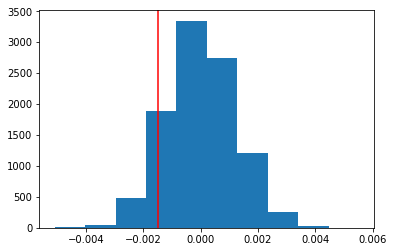

In [23]:
plt.hist(p_diffs)
obs_diff = obs_new-obs_old
plt.axvline(x = obs_diff,color='red')

***
**p_diff** adalah hasil simulasi 10.000 nilai pnew  -  pold  
<br>**obs_diff** adalah probabilitas converted dari seorang individu dalam grup treatment **dikurangi** dengan probabilitas converted dari seorang individu dalam grup kontrol
***

# proporsi nilai p_diffs yang lebih besar dari obs_diff

In [24]:
(p_diffs > obs_diff).mean()

0.895

***
old_page memiliki converted rate yang lebih tinggi atau sama dari new_page dengan probabilitas 89,5%.
***

# Menghitung Z-test dengan built in function

In [25]:
import statsmodels.api as sm

convert_old = df.query('landing_page == "old_page"')['converted'].sum()
convert_new = df.query('landing_page == "new_page"')['converted'].sum()

In [26]:
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new, n_old],alternative='larger')

In [27]:
print('nilai z_score = %.2f' % z_score )

nilai z_score = -1.37


***
**Z-score** adalah angka yang merupakan perbedaan antara nilai data dan rata-rata, dibagi dengan standar deviasi
<br>
Z-score juga sering disebut dengan nilai baku atau nilai standar. Z-score dapat digunakan untuk membantu menentukan apakah sebuah data bernilai ekstrem, atau outlier. Data outlier adalah data yang bernilai jauh dari rata-rata. Aturan umumnya adalah Z-score dengan nilai kurang dari –3 atau lebih dari +3 menunjukkan bahwa nilai data adalah nilai ekstrem.
***

In [28]:
print('nilai p_value = %.2f' % p_value )

nilai p_value = 0.91


***
**p-value** adalah nilai kesalahan yang di dapat peneliti dari hasil perhitungan statistik. nilai ini akan digunakan untuk menguji H0 diterima atau ditolak
***

In [29]:
alpha = 0.05
if ( p_value > alpha ) :
    print ('H0 diterima \nOld Page lebih baik',)
else : 
    print ('H0 ditolak \nNew Page lebih baik')

H0 diterima 
Old Page lebih baik


***
Z-test adalah uji statistik yang digunakan untuk mengetahui apakah suatu populasi memiliki rata-rata yang sama dengan, lebih kecil atau lebih besar dari suatu nilai rata-rata tertentu sesuai dengan hipotesis yang telah ditetapkan.
>H0 adalah hipotesis null (hipotesis awal), H1 adalah hipotesis tandingan (alternatif)
<br>Tingkat kepercayaan yang sering digunakan dalam pengujian statistik adalah 95 persen atau (1-alpha)=0,95
<br>Tingkat signifikansinya adalah 5 persen (alpha = 0,05)
<br>Jika nilai P-value lebih besar dari alpha, maka H0 tidak ditolak(diterima)
<br>Jika nilai P-value lebih kecil dari alpha, maka H0 ditolak
***

# Kesimpulan
Perusahaan Sebaiknya mempertahankan landing page lama dari websitenya